# **Proyek Predictive Analytics: Prediksi Penyakit Jantung**

- **Nama:** Muhammad Husain Fadhlillah
- **Email Student:** mc006d5y2343@student.devacademy.id
- **Cohort ID:** MC006D5Y2343

## **1. Mengimpor Library yang Dibutuhkan**
Langkah pertama adalah mengimpor semua library Python yang akan digunakan.

In [1]:
# Mengabaikan peringatan yang tidak relevan agar output lebih bersih
import warnings
warnings.filterwarnings('ignore')

# Library untuk manipulasi dan analisis data
import pandas as pd
import numpy as np

# Library untuk visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns

# Library dari Scikit-learn untuk machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Mengatur agar plot ditampilkan inline di notebook
%matplotlib inline

## **2. Data Loading dan Understanding**
Pada tahap ini akan memuat dataset, yaitu "Heart Failure Prediction" dari file CSV yang diunggah. Dataset ini memiliki 918 sampel.

In [2]:
# Memuat dataset dari file CSV
# Pastikan file 'heart.csv' berada di direktori yang sama atau unggah ke environment Colab
df = pd.read_csv('heart.csv')

# Menampilkan 5 baris pertama dari dataframe
print("Data Awal (5 baris pertama):")
display(df.head())

# Menampilkan informasi dasar dataframe untuk memahami tipe data dan non-null counts
print("\nInformasi DataFrame:")
df.info()

# Variabel target kita adalah 'HeartDisease' (1: Gagal Jantung, 0: Sehat)

Data Awal (5 baris pertama):


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0



Informasi DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


## **3. Exploratory Data Analysis (EDA)**
Melakukan analisis dan visualisasi pada data untuk mendapatkan wawasan lebih dalam. Ini termasuk memeriksa distribusi fitur, keseimbangan kelas target, dan korelasi antar fitur.

In [3]:
# Menampilkan statistik deskriptif untuk fitur numerik
print("Statistik Deskriptif:")
display(df.describe())

# Memisahkan fitur numerik dan kategorikal untuk analisis lebih lanjut
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Variabel target 'HeartDisease' adalah numerik (0 atau 1) jadi kita pindahkan dari categorical
numerical_cols.remove('HeartDisease')

print(f"\nFitur Numerik: {numerical_cols}")
print(f"Fitur Kategorikal: {categorical_cols}")

Statistik Deskriptif:


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000



Fitur Numerik: ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']
Fitur Kategorikal: ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']


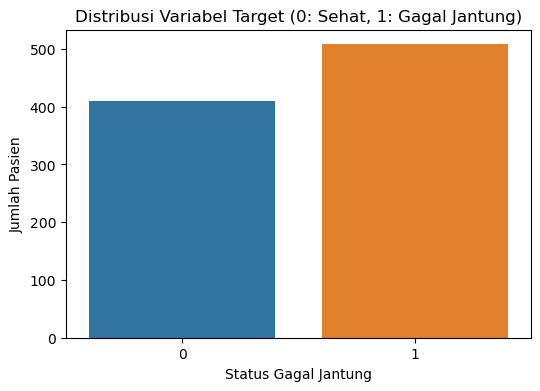

1    508
0    410
Name: HeartDisease, dtype: int64


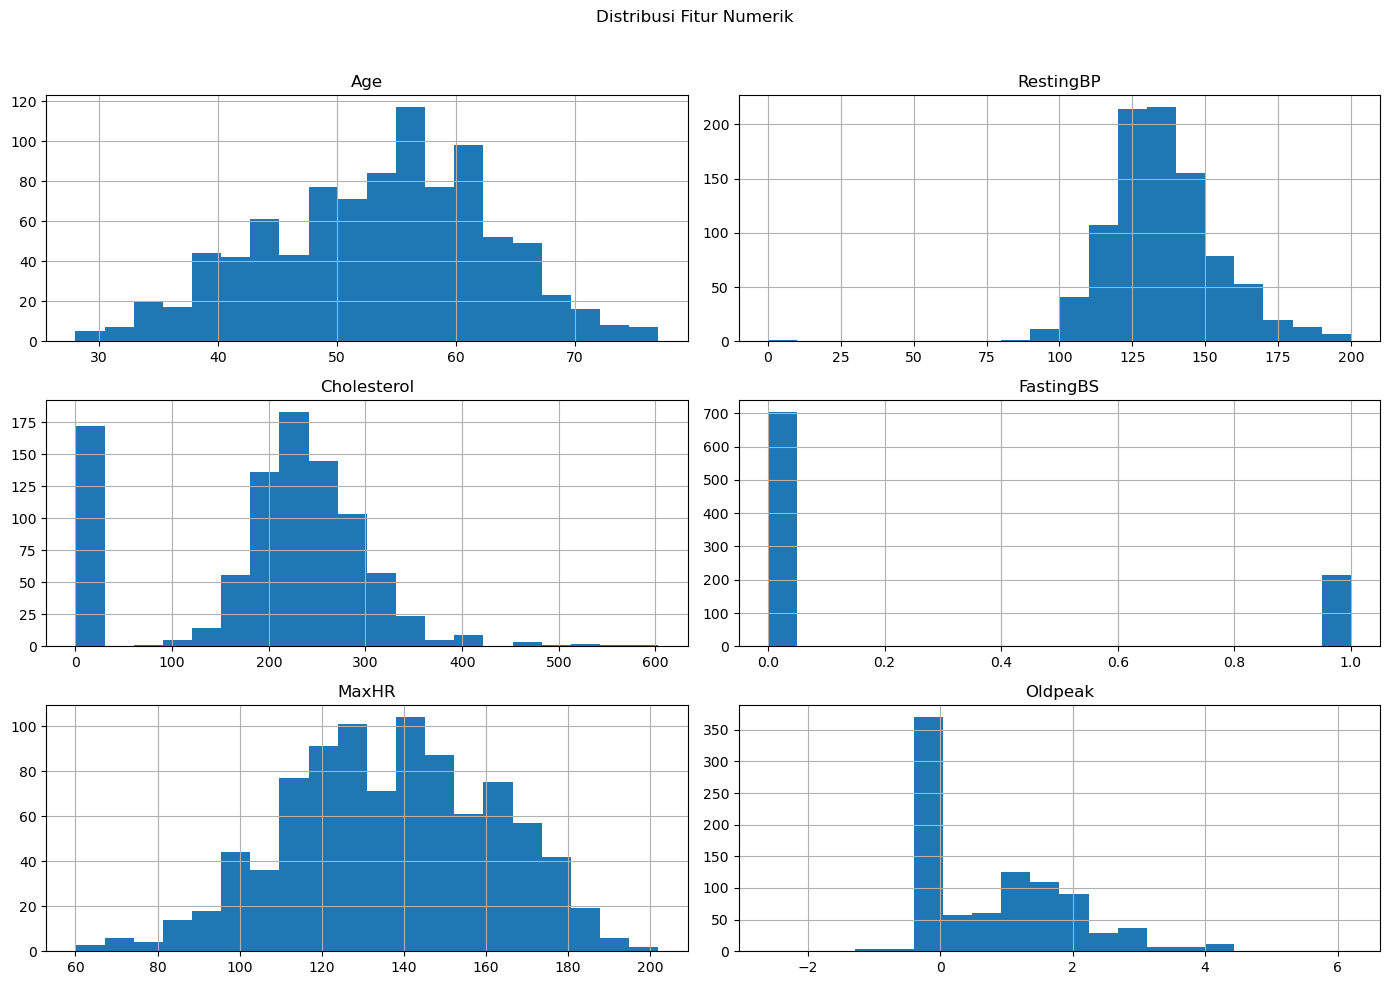

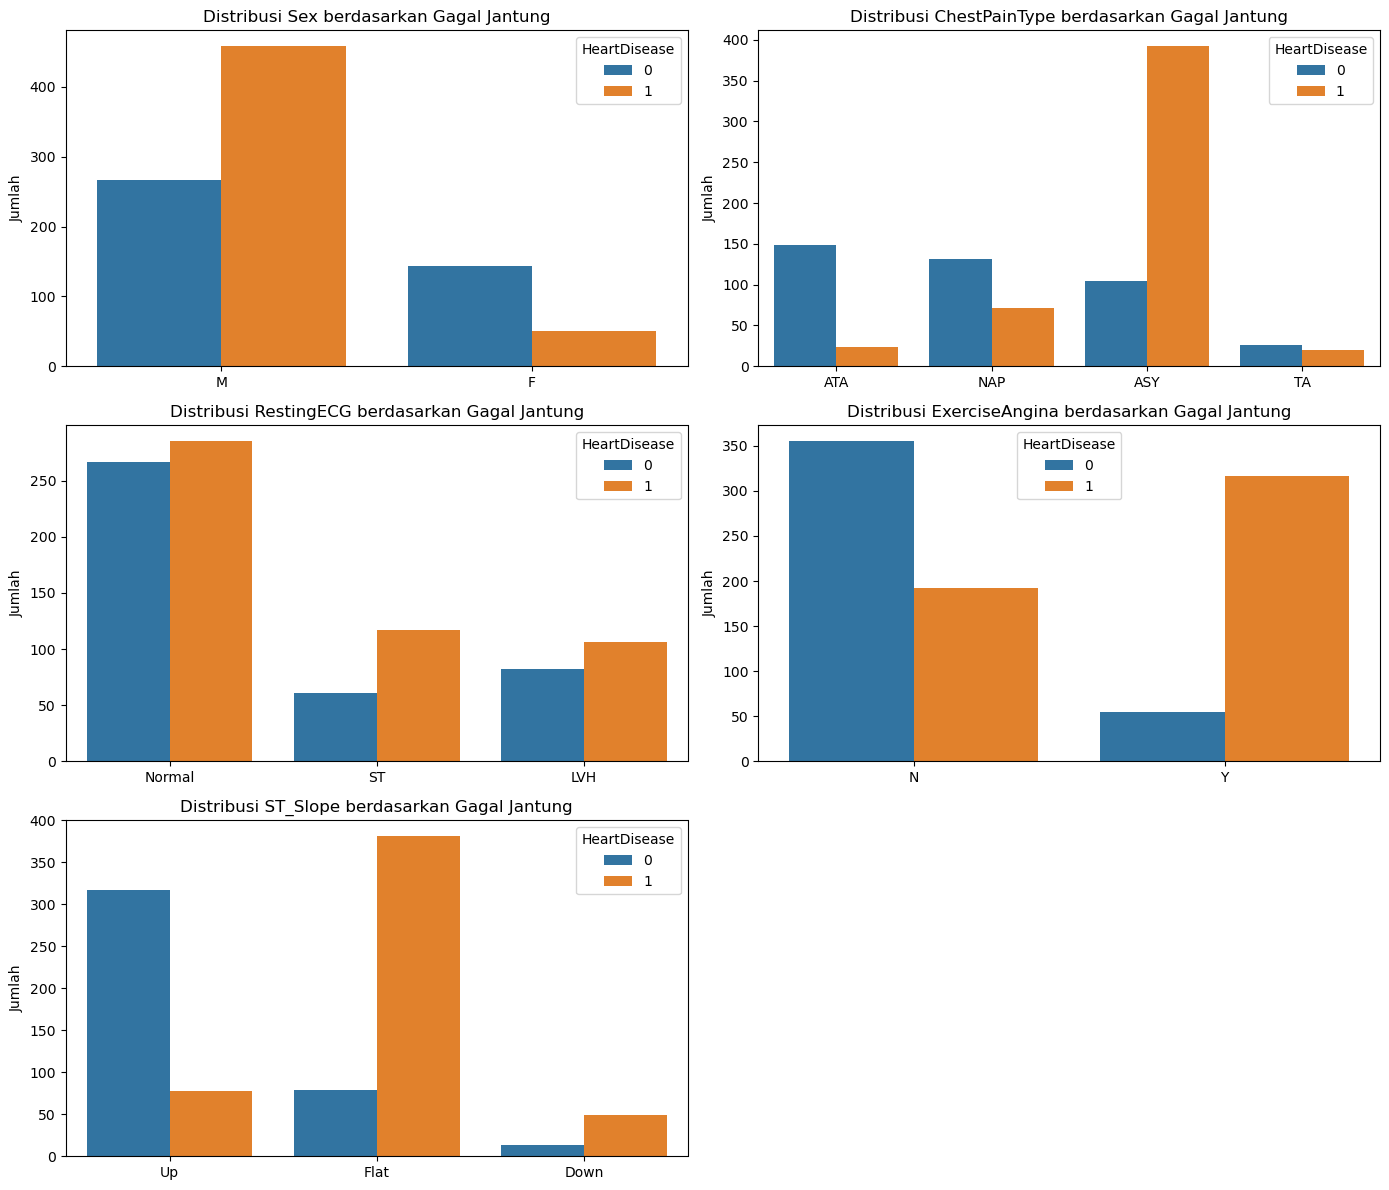

In [4]:
# Visualisasi distribusi variabel target
plt.figure(figsize=(6, 4))
sns.countplot(x='HeartDisease', data=df)
plt.title('Distribusi Variabel Target (0: Sehat, 1: Gagal Jantung)')
plt.xlabel('Status Gagal Jantung')
plt.ylabel('Jumlah Pasien')
plt.show()
print(df['HeartDisease'].value_counts())

# Visualisasi distribusi fitur numerik
df[numerical_cols].hist(figsize=(14, 10), bins=20)
plt.suptitle('Distribusi Fitur Numerik')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Visualisasi distribusi fitur kategorikal
plt.figure(figsize=(14, 12))
for i, col in enumerate(categorical_cols):
    plt.subplot(3, 2, i + 1)
    sns.countplot(x=col, data=df, hue='HeartDisease')
    plt.title(f'Distribusi {col} berdasarkan Gagal Jantung')
    plt.xlabel('')
    plt.ylabel('Jumlah')
plt.tight_layout()
plt.show()

## **4. Data Cleaning & Preparation**

Tahap ini meliputi:
1. Pemisahan fitur dan target.
2. Penanganan data duplikat.
3. Pemisahan data menjadi set pelatihan dan pengujian.
4. Pembuatan pipeline untuk preprocessing (standarisasi untuk numerik dan one-hot encoding untuk kategorikal).

Catatan: Dataset ini tidak memiliki missing values, namun kita akan tetap memeriksa dan menangani data duplikat. Penanganan outlier tidak dilakukan karena distribusi data numerik cukup wajar dan dalam konteks medis, nilai ekstrem bisa jadi data valid.

In [5]:
# Memisahkan fitur (X) dan target (y)
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

# Memeriksa dan menangani data duplikat
print(f"Jumlah data duplikat sebelum dihapus: {X.duplicated().sum()}")
if X.duplicated().sum() > 0:
    # Simpan indeks data yang tidak duplikat
    non_duplicate_indices = ~X.duplicated()
    X = X[non_duplicate_indices]
    y = y[non_duplicate_indices]
    print(f"Jumlah data duplikat setelah dihapus: {X.duplicated().sum()}")

print(f"\nUkuran data setelah dibersihkan: {X.shape}")

# Membagi data menjadi data latih (80%) dan data uji (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"\nUkuran data latih: {X_train.shape}")
print(f"Ukuran data uji: {X_test.shape}")

Jumlah data duplikat sebelum dihapus: 0

Ukuran data setelah dibersihkan: (918, 11)

Ukuran data latih: (734, 11)
Ukuran data uji: (184, 11)


In [6]:
# Membuat pipeline untuk preprocessing
# Fitur numerik akan di-scale menggunakan StandardScaler
# Fitur kategorikal akan di-encode menggunakan OneHotEncoder

numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Membuat preprocessor dengan ColumnTransformer
# Ini akan menerapkan transformer yang berbeda ke kolom yang berbeda
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ],
    remainder='passthrough' # Kolom yang tidak disebutkan akan dilewatkan
)

# Menampilkan pipeline preprocessor
print("Pipeline Preprocessing:")
display(preprocessor)

Pipeline Preprocessing:


ColumnTransformer(remainder='passthrough',
                  transformers=[('num', StandardScaler(),
                                 ['Age', 'RestingBP', 'Cholesterol',
                                  'FastingBS', 'MaxHR', 'Oldpeak']),
                                ('cat', OneHotEncoder(handle_unknown='ignore'),
                                 ['Sex', 'ChestPainType', 'RestingECG',
                                  'ExerciseAngina', 'ST_Slope'])])

## **5. Modeling**
Membangun, melatih, dan mengevaluasi dua model klasifikasi: Logistic Regression dan Random Forest. Akan mengintegrasikan preprocessor ke dalam pipeline model untuk memastikan data diproses dengan benar sebelum pelatihan.

In [7]:
# === Model 1: Logistic Regression ===

# Membuat pipeline lengkap yang menggabungkan preprocessor dan model
log_reg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42))
])

# Melatih model Logistic Regression menggunakan pipeline
print("Melatih model Logistic Regression...")
log_reg_pipeline.fit(X_train, y_train)
print("Model Logistic Regression berhasil dilatih.\n")


# === Model 2: Random Forest ===

# Membuat pipeline lengkap untuk Random Forest
rand_forest_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42))
])

# Melatih model Random Forest menggunakan pipeline
print("Melatih model Random Forest...")
rand_forest_pipeline.fit(X_train, y_train)
print("Model Random Forest berhasil dilatih.")

Melatih model Logistic Regression...
Model Logistic Regression berhasil dilatih.

Melatih model Random Forest...
Model Random Forest berhasil dilatih.


## **6. Evaluation**
Evaluasi performa kedua model menggunakan berbagai metrik pada data uji. Fungsi evaluasi yang sama akan digunakan untuk memastikan perbandingan yang adil.

--- Evaluasi Model: Logistic Regression ---
Akurasi: 0.886
Presisi: 0.872
Recall: 0.931
F1-Score: 0.900

Laporan Klasifikasi:
               precision    recall  f1-score   support

        Sehat       0.91      0.83      0.87        82
Gagal Jantung       0.87      0.93      0.90       102

     accuracy                           0.89       184
    macro avg       0.89      0.88      0.88       184
 weighted avg       0.89      0.89      0.89       184



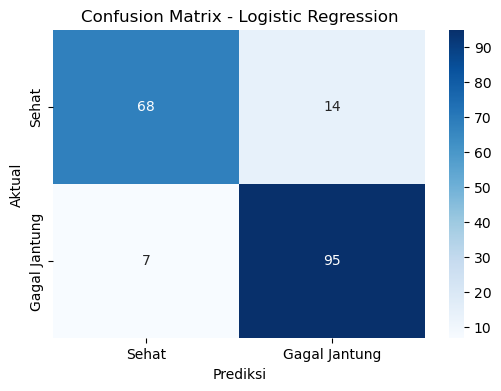

--- Evaluasi Model: Random Forest ---
Akurasi: 0.902
Presisi: 0.896
Recall: 0.931
F1-Score: 0.913

Laporan Klasifikasi:
               precision    recall  f1-score   support

        Sehat       0.91      0.87      0.89        82
Gagal Jantung       0.90      0.93      0.91       102

     accuracy                           0.90       184
    macro avg       0.90      0.90      0.90       184
 weighted avg       0.90      0.90      0.90       184



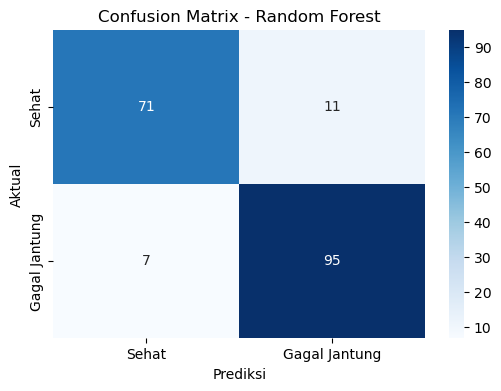

In [8]:
# Fungsi untuk mengevaluasi model dan menampilkan hasilnya
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)

    # Menghitung metrik evaluasi
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Menampilkan hasil
    print(f"--- Evaluasi Model: {model_name} ---")
    print(f"Akurasi: {accuracy:.3f}")
    print(f"Presisi: {precision:.3f}")
    print(f"Recall: {recall:.3f}")
    print(f"F1-Score: {f1:.3f}\n")
    
    # Menampilkan Laporan Klasifikasi
    print("Laporan Klasifikasi:")
    print(classification_report(y_test, y_pred, target_names=['Sehat', 'Gagal Jantung']))
    
    # Menampilkan Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Sehat', 'Gagal Jantung'],
                yticklabels=['Sehat', 'Gagal Jantung'])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Prediksi')
    plt.ylabel('Aktual')
    plt.show()
    
    return {'Akurasi': accuracy, 'Presisi': precision, 'Recall': recall, 'F1-Score': f1}

# Mengevaluasi kedua model pipeline
log_reg_metrics = evaluate_model(log_reg_pipeline, X_test, y_test, "Logistic Regression")
rand_forest_metrics = evaluate_model(rand_forest_pipeline, X_test, y_test, "Random Forest")

## **7. Perbandingan Hasil dan Kesimpulan**
Membandingkan metrik evaluasi dari kedua model untuk menentukan model mana yang memberikan performa terbaik untuk kasus prediksi gagal jantung.

In [9]:
# Membuat DataFrame untuk membandingkan metrik dari kedua model
metrics_df = pd.DataFrame({
    'Logistic Regression': log_reg_metrics,
    'Random Forest': rand_forest_metrics
}).T # .T untuk transpose (menukar baris dan kolom)

print("Perbandingan Metrik Evaluasi:")
display(metrics_df.round(3))

# Menentukan model terbaik berdasarkan F1-Score
best_model_name = metrics_df['F1-Score'].idxmax()
print(f"\nKesimpulan: Model terbaik berdasarkan F1-Score adalah **{best_model_name}**.")

Perbandingan Metrik Evaluasi:


,Akurasi,Presisi,Recall,F1-Score
Logistic Regression,0.886,0.872,0.931,0.900
Random Forest,0.902,0.896,0.931,0.913



Kesimpulan: Model terbaik berdasarkan F1-Score adalah **Random Forest**.
